# Customer Segmentation using Unsupervised Machine Learning in Python

## Customer segmentation is the practice of dividing a company's customers into groups that reflect similarity among customers in each group. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.

import Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

#### Data Describe :
 columns details :

* ID: Customer's unique identifie  
* MntWines: Amount spent on wine in last 2 years
* NumDealsPurchases: Number of purchases made with a discount
* NumWebPurchases: Number of purchases made through the company’s website
* Year_Birth: Customer's birth year
* MntFruits: Amount spent on fruits in last 2 years
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* NumCatalogPurchases: Number of purchases made using a catalogue
* Education: Customer's education level
* MntMeatProducts: Amount spent on meat in last 2 years
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* NumStorePurchases: Number of purchases made directly in stores

* Marital_Status: Customer's marital status
MntFishProducts: Amount spent on fish in last 2 years
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* NumWebVisitsMonth: Number of visits to company’s website in the last month
* Income: Customer's yearly household income
* MntSweetProducts: Amount spent on sweets in last 2 years
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* Kidhome: Number of children in customer's household
MntGoldProds: Amount spent on gold in last 2 years
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Teenhome: Number of teenagers in customer's household
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

In [3]:
# df= pd.read_csv(r'C:\Users\SAPTARSHI m\Downloads\clustting market campaingn data\marketing_campaign.csv',sep='\t')
df= pd.read_csv(r'marketing_campaign.csv',sep='\t')

In [4]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.shape

(2240, 29)

#### Data cleaning  and basic data exploration

In [ ]:
df.info()


In [7]:
df.duplicated(subset=df.drop('ID', axis=1).columns).sum()
# duplicates row is 182

182

In [8]:
df.drop_duplicates(subset=df.drop('ID', axis=1).columns, inplace= True)

In [9]:
df.shape

(2058, 29)

In [10]:
df.isna().sum()
# only Income  is missing
# as its very less want to drop it
df=df.dropna()

In [11]:
df.shape

(2034, 29)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2034.0,5596.718781,3259.973563,0.0,2804.75,5515.5,8441.25,11191.0
Year_Birth,2034.0,1968.802852,11.975420,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2034.0,52357.791544,25526.956988,1730.0,35528.25,51533.0,68480.75,666666.0
Kidhome,2034.0,0.442970,0.535914,0.0,0.00,0.0,1.00,2.0
Teenhome,2034.0,0.508358,0.546130,0.0,0.00,0.0,1.00,2.0
Recency,2034.0,48.844641,28.983678,0.0,24.00,49.0,74.00,99.0
MntWines,2034.0,305.180924,337.323274,0.0,23.00,175.5,505.00,1493.0
MntFruits,2034.0,26.292527,39.772885,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2034.0,167.763520,226.790697,0.0,16.00,68.0,230.00,1725.0
MntFishProducts,2034.0,37.449361,54.792015,0.0,3.00,12.0,50.00,259.0


In [13]:
# Z_CostContact ,Z_Revenue >> not givenany details so drop it
# ID not required for model

In [14]:
# year_ birth need no to convert to age because i wll apply minmax scaller
# lets check

In [15]:
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1


In [ ]:
# Dt_Customer is in date format want to split it for use

In [16]:
parts = df["Dt_Customer"].str.split("-", n=3, expand=True)
df["Dt_day"] = parts[0].astype('int')
df["Dt_month"] = parts[1].astype('int')
df["Dt_year"] = parts[2].astype('int')

In [17]:
 df.shape

(2034, 32)

In [18]:
df['Marital_Status'].value_counts()

Married     788
Together    514
Single      439
Divorced    216
Widow        70
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [19]:
for key in ['Alone','Absurd', 'YOLO']:
    df = df.drop(df[df['Marital_Status'] == key].index)

In [20]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Dt_day', 'Dt_month', 'Dt_year'],
      dtype='object')

In [21]:
df['prev_Acceptcmp']=df['AcceptedCmp1'] |  df['AcceptedCmp2'] |  df['AcceptedCmp3'] |  df['AcceptedCmp4'] |  df['AcceptedCmp5']

In [ ]:
# df.columns

In [22]:
# drop  less necessary columns
df_re=df.drop(['ID','Z_CostContact','Z_Revenue','Dt_Customer','Dt_day','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
               'AcceptedCmp1','AcceptedCmp2'],axis=1)

In [23]:
df_re.shape

(2027, 23)

## Data Visualize and Analysis

In [24]:
df_re.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'Dt_month', 'Dt_year', 'prev_Acceptcmp'],
      dtype='object')

In [25]:
df_re.nunique()

Year_Birth               59
Education                 5
Marital_Status            5
Income                 1972
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                775
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            211
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
Complain                  2
Response                  2
Dt_month                 12
Dt_year                   3
prev_Acceptcmp            2
dtype: int64

In [26]:
objective_col=[]
for col in df_re.columns:
    if df_re[col].dtype == object:
        objective_col.append(col)

In [ ]:
objective_col

['Education', 'Marital_Status']

<ipython-input-27-542c8ae10e9b>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i + 1)


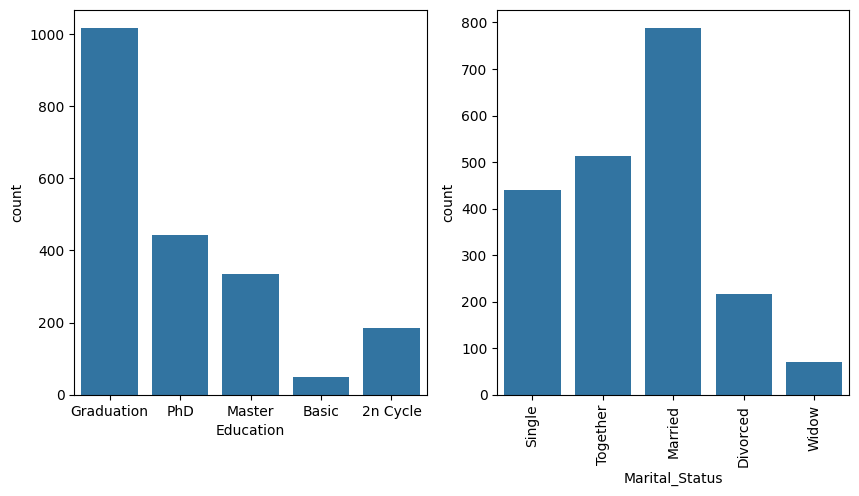

In [27]:
plt.subplots(figsize=(10, 5))
for i, col in enumerate(objective_col):
    plt.subplot(1, 2, i + 1)
    sns.countplot(df_re,x=col)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_re.shape

(2027, 23)

Data cleaning  after analysis

In [28]:
def educate(degree):

  if degree == ('Graduation' or 'Basic'):
    return 'Graduate_underGraduate'
  else:
    return 'Higher_educated'


In [39]:
df_re['educations']= df_re['Education'].apply(educate)

In [40]:
df_re=df_re.drop('Education',axis=1)

In [41]:
df_re.sample(4)

,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Dt_month,Dt_year,prev_Acceptcmp,M_Status,educations
596,1969,Divorced,23910.0,1,0,80,16,12,18,7,...,0,3,7,0,0,10,2012,0,Families,Graduate_underGraduate
716,1960,Divorced,87305.0,0,0,19,345,25,501,63,...,3,8,2,0,1,9,2012,1,Families,Higher_educated
2133,1980,Married,16005.0,1,0,69,1,3,2,20,...,1,2,8,0,0,8,2012,0,Families,Higher_educated
1848,1966,Married,57705.0,0,1,14,383,0,53,6,...,1,6,6,0,0,1,2014,0,Families,Higher_educated


In [32]:
df_re['Marital_Status'].value_counts()

Married     788
Together    514
Single      439
Divorced    216
Widow        70
Name: Marital_Status, dtype: int64

In [33]:
def status_m(d):
  if d == ('Single' or 'Divorced' or 'Widow'):
    return 'Single/d/w'
  else:
    return 'Families'



In [34]:
df_re['M_Status']=df_re['Marital_Status'].apply(status_m)

In [35]:
df_re['M_Status'].value_counts()

Families      1588
Single/d/w     439
Name: M_Status, dtype: int64

In [44]:
df_for_ml = df_re.drop('Marital_Status',axis=1)

correlation between columns

<ipython-input-45-787824e0be8d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_for_ml.corr())


<Axes: >

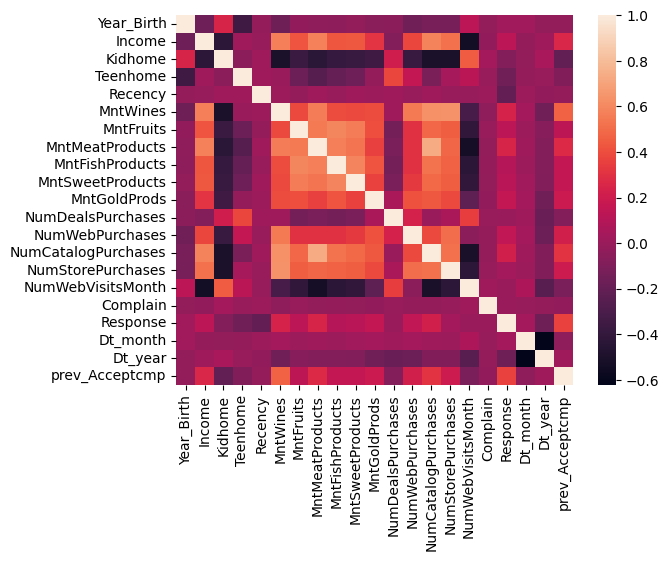

In [45]:

sns.heatmap(df_for_ml.corr())

In [46]:
df_cl = pd.get_dummies(df_for_ml)
df_cl.shape

(2027, 25)

In [47]:
df_cl.head(2)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,Complain,Response,Dt_month,Dt_year,prev_Acceptcmp,M_Status_Families,M_Status_Single/d/w,educations_Graduate_underGraduate,educations_Higher_educated
0,1957,58138.0,0,0,58,635,88,546,172,88,...,7,0,1,9,2012,0,0,1,1,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,5,0,0,3,2014,0,0,1,1,0


## Data Preprocessing

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler=StandardScaler()
df_scaled = scaler.fit_transform(df_cl)

In [50]:
df_scaled


array([[-0.98489751,  0.22636323, -0.82665639, ...,  1.90192326,
         0.99655256, -0.99655256],
       [-1.23558445, -0.23525634,  1.03930408, ...,  1.90192326,
         0.99655256, -0.99655256],
       [-0.31639899,  0.7537775 , -0.82665639, ..., -0.52578357,
         0.99655256, -0.99655256],
       ...,
       [ 1.02059803,  0.18107802, -0.82665639, ..., -0.52578357,
         0.99655256, -0.99655256],
       [-1.06845982,  0.66109349, -0.82665639, ..., -0.52578357,
        -1.00345936,  1.00345936],
       [-1.23558445,  0.02013349,  1.03930408, ..., -0.52578357,
        -1.00345936,  1.00345936]])

In [51]:
df_scaled = pd.DataFrame(df_scaled,columns=df_cl.columns)
# df_scaled

In [52]:
df_scaled.head(4)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,Complain,Response,Dt_month,Dt_year,prev_Acceptcmp,M_Status_Families,M_Status_Single/d/w,educations_Graduate_underGraduate,educations_Higher_educated
0,-0.984898,0.226363,-0.826656,-0.930402,0.313589,0.976525,1.551653,1.666111,2.466145,1.464209,...,0.688480,-0.099825,2.357938,0.725201,-1.505246,-0.515066,-1.901923,1.901923,0.996553,-0.996553
1,-1.235584,-0.235256,1.039304,0.900593,-0.376617,-0.871636,-0.635937,-0.713709,-0.647689,-0.630663,...,-0.132190,-0.099825,-0.424099,-0.987067,1.411708,-0.515066,-1.901923,1.901923,0.996553,-0.996553
2,-0.316399,0.753777,-0.826656,-0.930402,-0.790741,0.357509,0.571010,-0.180453,1.348828,-0.149083,...,-0.542524,-0.099825,-0.424099,0.439823,-0.046769,-0.515066,0.525784,-0.525784,0.996553,-0.996553
3,1.271285,-1.006240,1.039304,-0.930402,-0.790741,-0.871636,-0.560503,-0.652010,-0.501156,-0.582505,...,0.278145,-0.099825,-0.424099,-1.272445,1.411708,-0.515066,0.525784,-0.525784,0.996553,-0.996553


In [53]:
df_scaled.isnull().sum()

Year_Birth                           0
Income                               0
Kidhome                              0
Teenhome                             0
Recency                              0
MntWines                             0
MntFruits                            0
MntMeatProducts                      0
MntFishProducts                      0
MntSweetProducts                     0
MntGoldProds                         0
NumDealsPurchases                    0
NumWebPurchases                      0
NumCatalogPurchases                  0
NumStorePurchases                    0
NumWebVisitsMonth                    0
Complain                             0
Response                             0
Dt_month                             0
Dt_year                              0
prev_Acceptcmp                       0
M_Status_Families                    0
M_Status_Single/d/w                  0
educations_Graduate_underGraduate    0
educations_Higher_educated           0
dtype: int64

In [54]:
df_scaled=df_scaled.dropna()

feature reduction # not required

In [ ]:
# from sklearn.decomposition import PCA

In [ ]:
# # Creating maximum components equal to the total number of columns to analyze all of them
# pca = PCA()

# # fitting the data
# pca_fit=pca.fit(df_scaled)

# # calculating the principal components
# df_p= pca_fit.transform(df_scaled)


In [ ]:
# df_p.shape

(2027, 31)

In [ ]:
# var_explained

array([0.29558016, 0.09753707, 0.08309928, 0.06739019, 0.05359629,
       0.04888327, 0.04816737, 0.03770291, 0.03669991, 0.02941742,
       0.02734823, 0.02553928, 0.02308713, 0.02112823, 0.02013668,
       0.01870386, 0.01746415, 0.01527047, 0.01196395, 0.01116207,
       0.01012205, 0.        , 0.        ])

Text(0, 0.5, '% Variance explained')

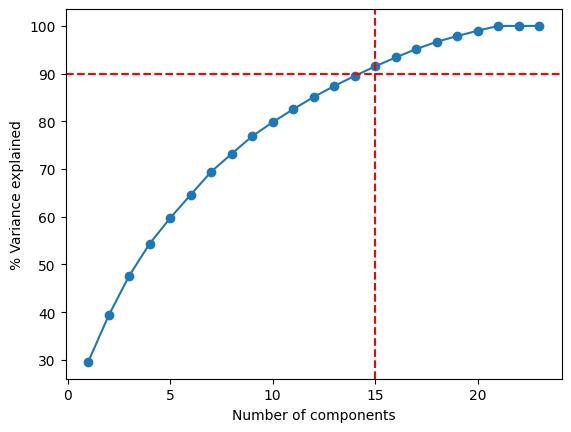

In [ ]:
# The Amount of variance explained by each principle componnent
# var_explained= pca.explained_variance_ratio_

# var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
# plt.plot( range(1,24), var_explained_cumulative ,marker='o',label='var_explained_cumulative')
# plt.axhline(y = 90, color = 'r', linestyle = '--')
# plt.axvline(x = 15, color = 'r', linestyle = '--')
# plt.xlabel('Number of components')
# plt.ylabel('% Variance explained')
# # plt.ylim(50, 99)
# # plt.xlim(15, 35)

In [59]:
# plt.bar(range(1, 24), var_explained, alpha=0.6, color='g', label='Individual Explained Variance')

In [62]:
df_scaled.shape

(2027, 25)

Here i am taking principal components 15

In [ ]:
# pca = PCA(15)

# # fitting the data
# pca_fit=pca.fit(df_scaled)

# # calculating the principal components
# df_p= pca_fit.transform(df_scaled)


## KMeans Clustering

In [56]:
from sklearn.cluster import KMeans

In [66]:
ssd = []
for k in range(1,20):

    model = KMeans(n_clusters=k,max_iter=300)
    model.fit(df_scaled)

    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Find out the optimum k value from diagram

Text(0, 0.5, ' Sum of Squared Distances')

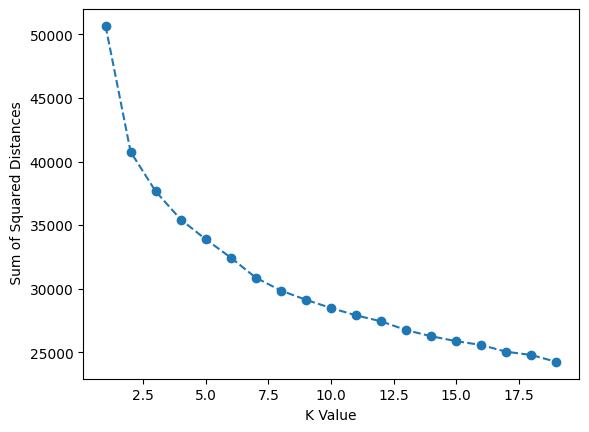

In [67]:
plt.plot(range(1,20),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

<Axes: >

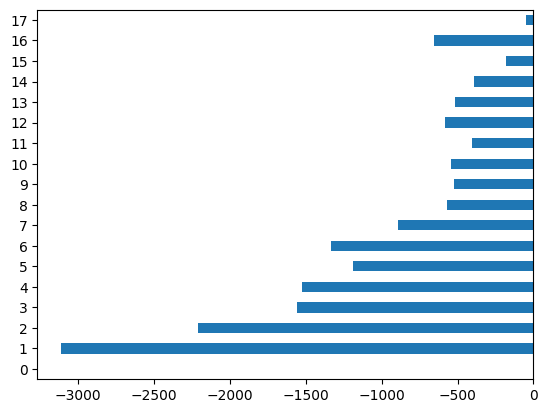

In [61]:
pd.Series(ssd).diff().plot(kind='barh')

Finnd teh optimum k value using Silhouette Score

In [63]:
# silhouette score
from sklearn.metrics import silhouette_score

# Defining the list of clusters to try
n_clusters_list=np.arange(start=2, stop=20, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()

for n_clusters_trial in n_clusters_list:

    # Generating Kmeans clustering
    from sklearn.cluster import KMeans
    kc = KMeans(n_clusters=n_clusters_trial)

    silhouette = silhouette_score(df_scaled,kc.fit_predict(df_scaled))

    # Appending the result of each iteration
    silhouette_scores_data=pd.concat([silhouette_scores_data, pd.DataFrame(data=[[silhouette,n_clusters_trial]],
                                                                          columns=["score", "Clusters"])])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [73]:
silhouette_scores_data.sort_values(by='score', ascending =False).head()

,score,Clusters
0,0.206814,2
0,0.140198,3
0,0.137122,6
0,0.133288,4
0,0.131151,5


## Hhierarchical clustering

<Axes: >

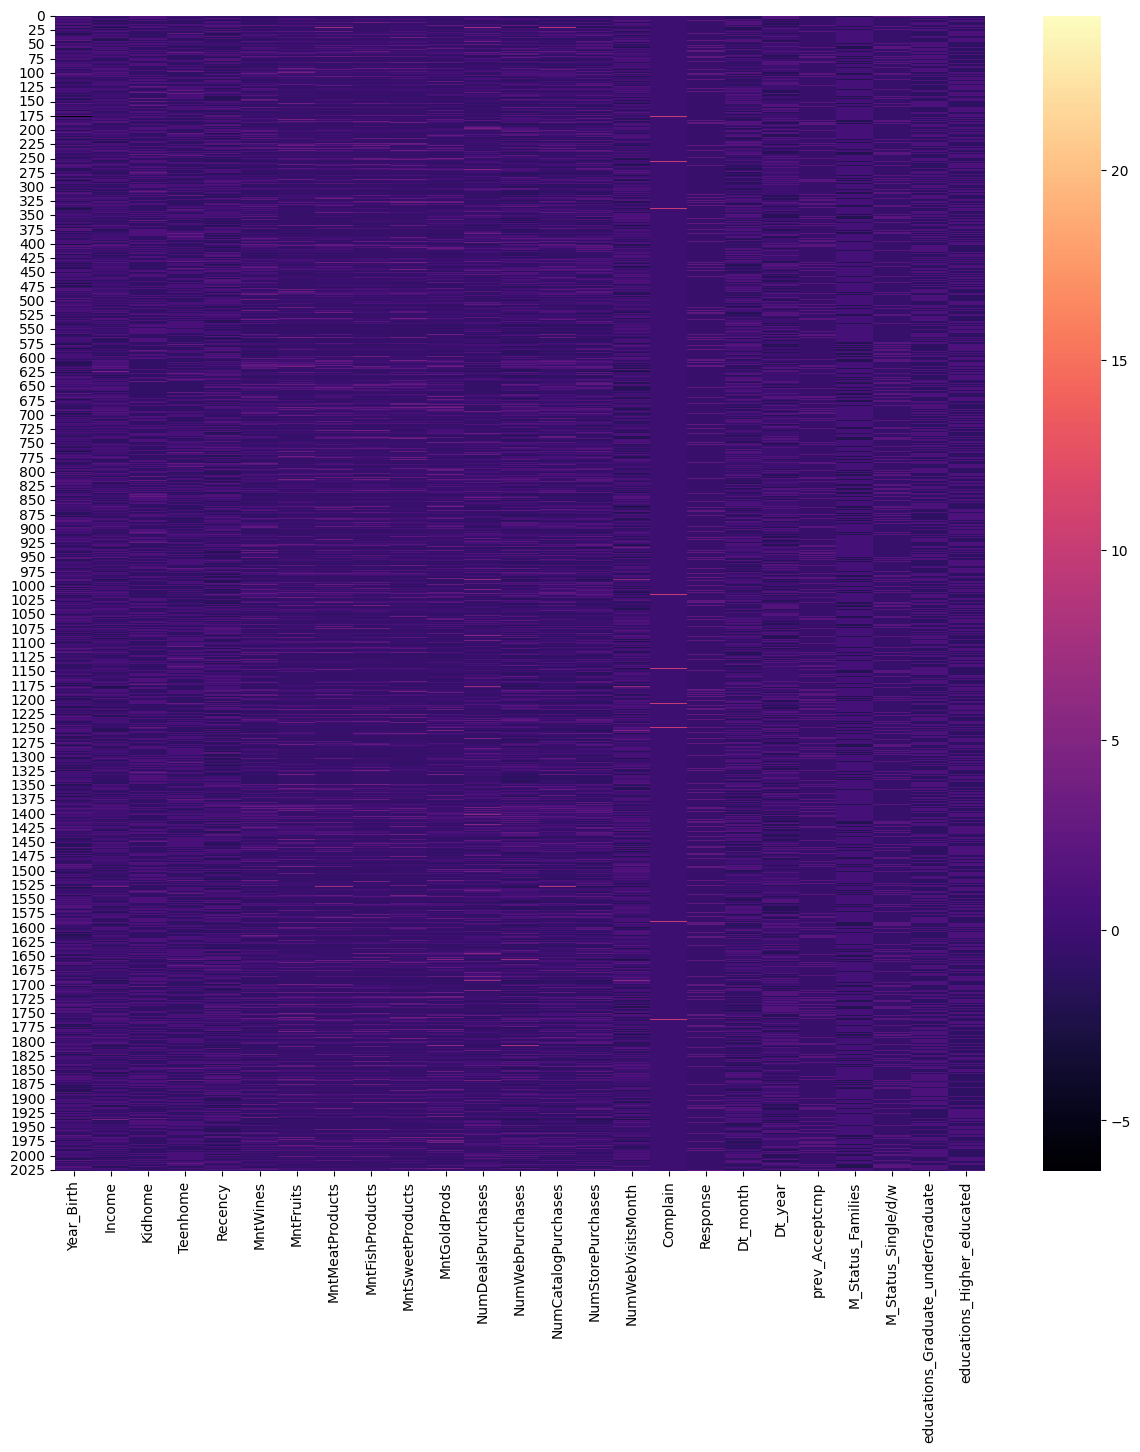

In [74]:

plt.figure(figsize=(15,15))
sns.heatmap(df_scaled,cmap='magma')

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


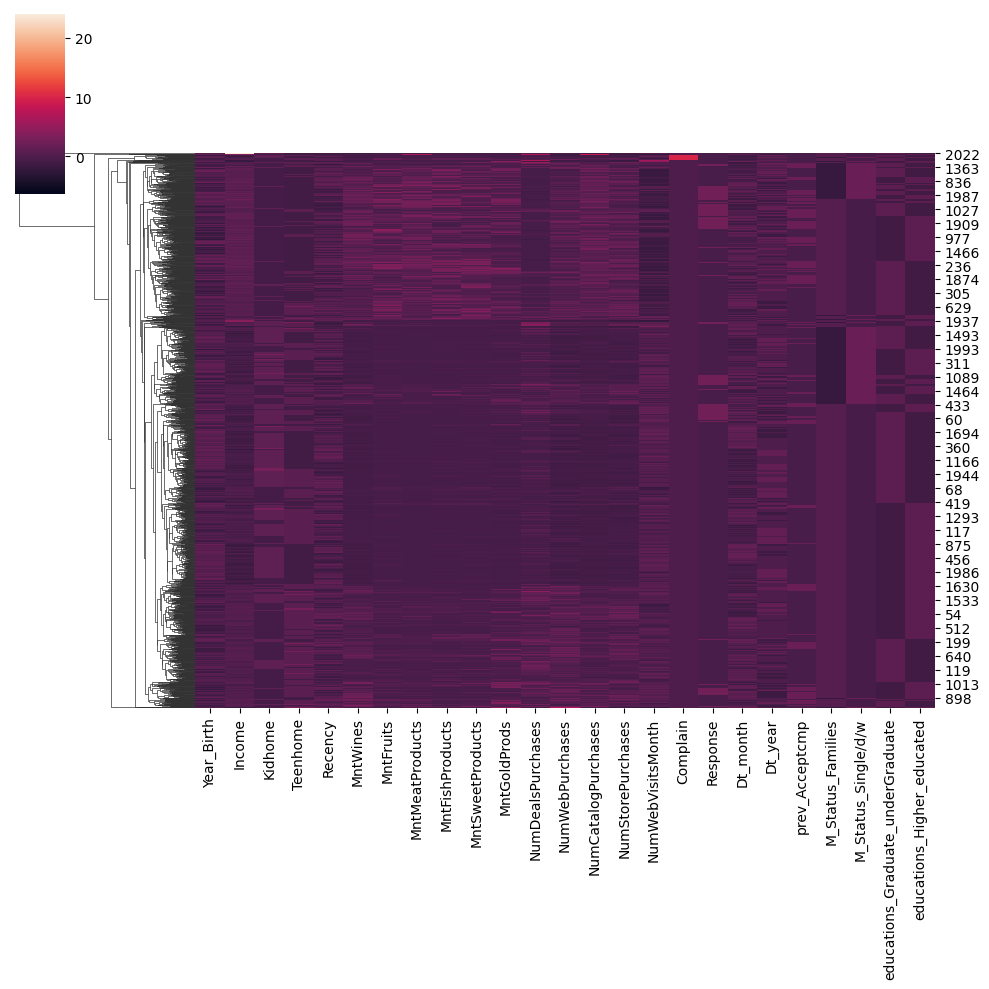

In [75]:
sns.clustermap(df_scaled,col_cluster=False)

Import Agglomerative Clustering for heirarchical approach

In [76]:
from sklearn.cluster import AgglomerativeClustering

In [77]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

In [78]:
cluster_labels = model.fit_predict(df_scaled)

In [79]:
cluster_labels

array([1371, 1744, 1264, ...,    4,    1,    0])

In [80]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [81]:
linkage_matrix = hierarchy.linkage(model.children_)

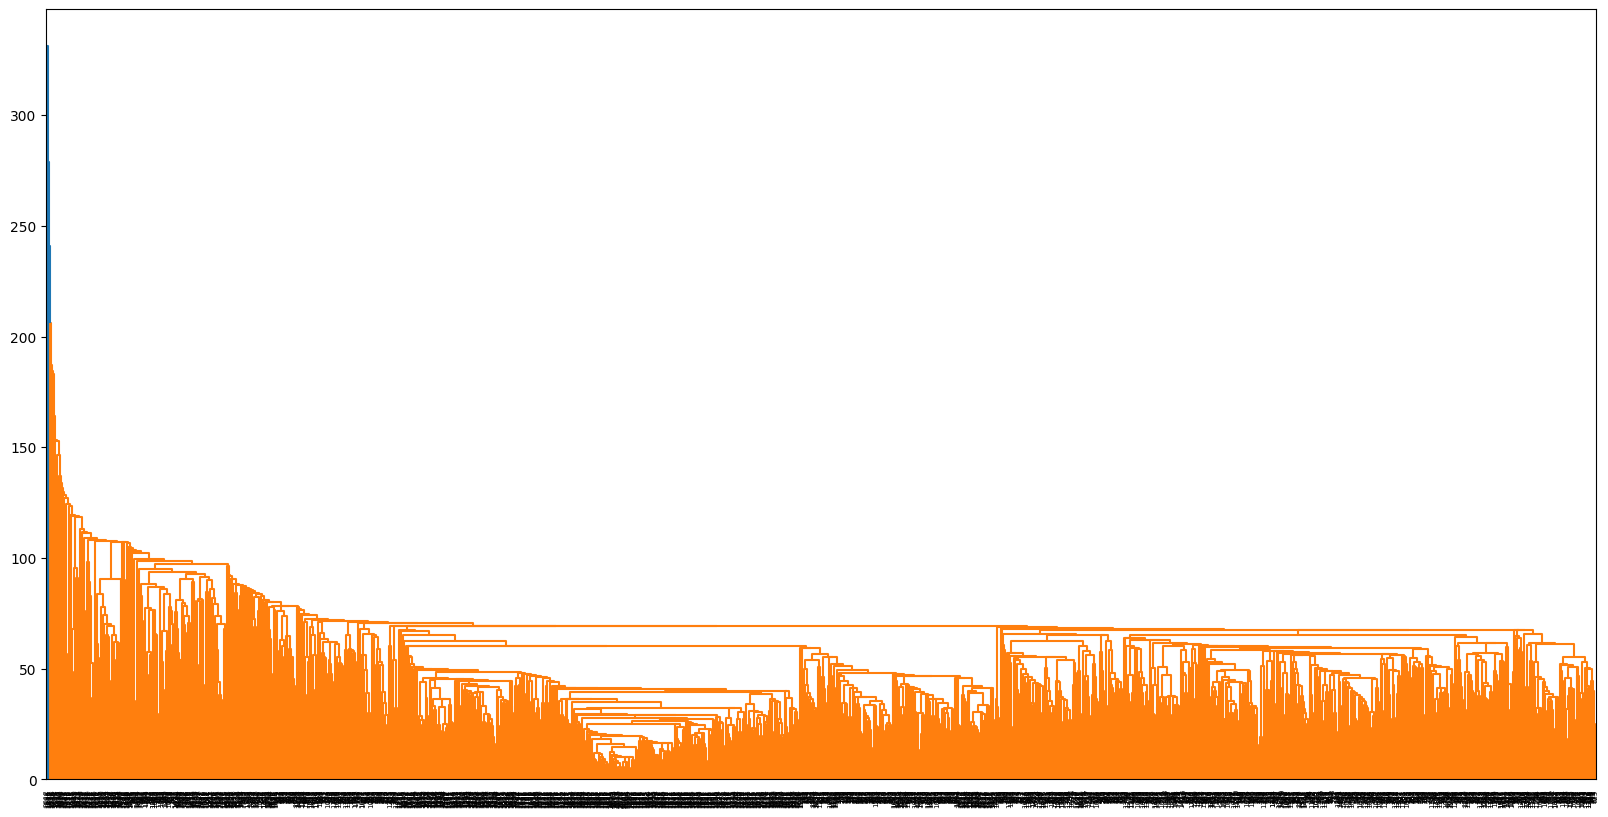

In [82]:
plt.figure(figsize=(20,10))
# Warning! This plot will take awhile!!
dn = hierarchy.dendrogram(linkage_matrix)

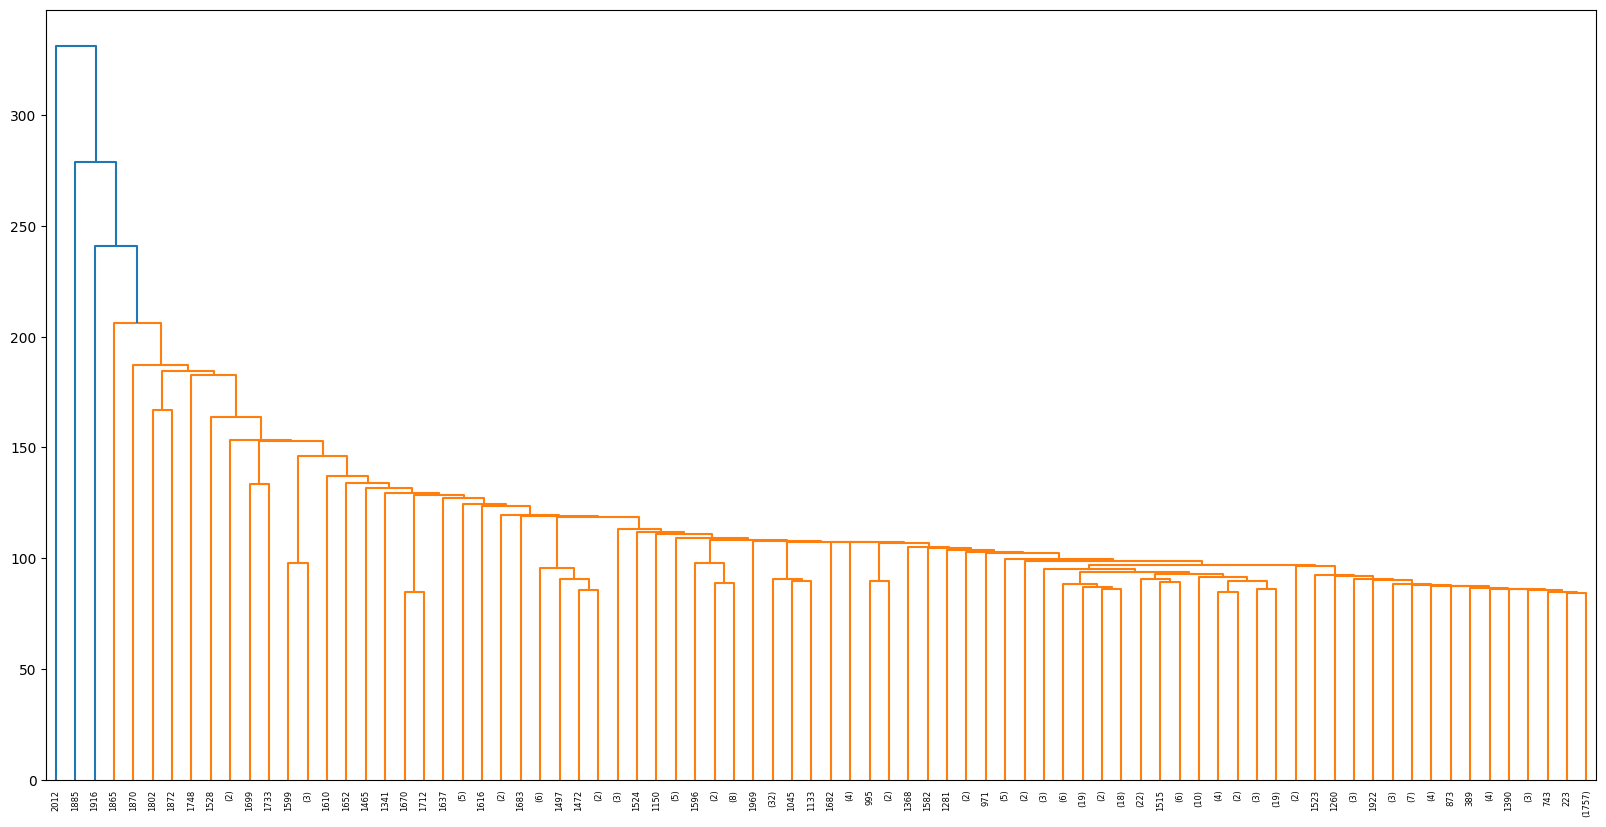

In [83]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=80)

In [84]:
# silhouette score
from sklearn.metrics import silhouette_score

# Defining the list of clusters to try
n_clusters_list=np.arange(start=2, stop=23, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()

for n_clusters_trial in n_clusters_list:

    # Generating Hierarchical clusters
    from sklearn.cluster import AgglomerativeClustering
    hc = AgglomerativeClustering(n_clusters=n_clusters_trial, metric = 'euclidean', linkage = 'ward')

    silhouette = silhouette_score(df_scaled,hc.fit_predict(df_scaled))

    # Appending the result of each iteration
    silhouette_scores_data=pd.concat([silhouette_scores_data, pd.DataFrame(data=[[silhouette,n_clusters_trial]],
                                                                          columns=["score", "Clusters"])])

In [86]:
silhouette_scores_data.sort_values(by='score', ascending=False).head()

,score,Clusters
0,0.205391,2
0,0.119197,6
0,0.115741,5
0,0.104831,4
0,0.097214,15


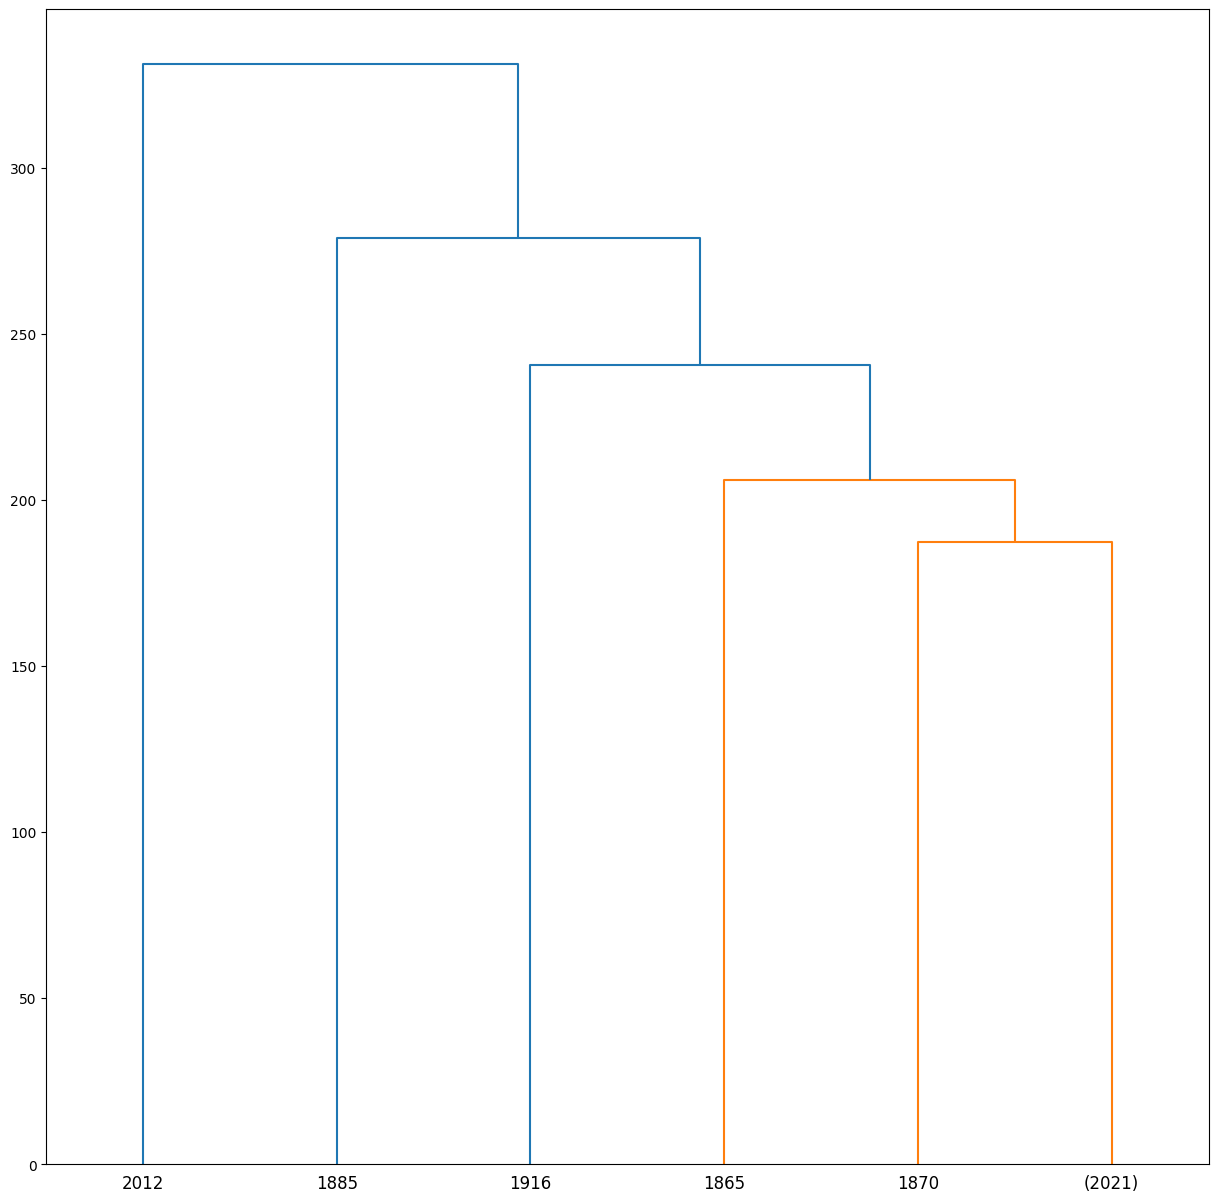

In [87]:
linkage_matrix = hierarchy.linkage(model.children_)
plt.figure(figsize=(15,15))
dn=hierarchy.dendrogram(linkage_matrix,truncate_mode="level",p=4)

So after using Heirarchical clustering best silhoutte score is for n = 2 then 6
for busniness strategy 6 or 2 is best option .i choose n= 2

## Lets check and visualize

In [92]:
# Generating Hierarchical clusters for n= 2
from sklearn.cluster import AgglomerativeClustering
h_clusster = AgglomerativeClustering(n_clusters=2, metric = 'euclidean', linkage = 'ward')
df_scaled['cluster_level']=h_clusster.fit_predict(df_scaled)

In [89]:
df_scaled['cluster_level']

0       1
1       0
2       1
3       0
4       1
       ..
2022    1
2023    0
2024    1
2025    0
2026    0
Name: cluster_level, Length: 2027, dtype: int64

columns correlated with clusters mapping

In [97]:
abs(df_scaled.corr()['cluster_level']).sort_values(ascending=False)

cluster_labels                       1.000000
cluster_label                        1.000000
cluster_level                        1.000000
MntMeatProducts                      0.729825
NumCatalogPurchases                  0.656219
MntFishProducts                      0.655938
MntFruits                            0.651920
MntSweetProducts                     0.631997
NumWebVisitsMonth                    0.571354
Income                               0.561970
MntWines                             0.512460
NumStorePurchases                    0.499224
Kidhome                              0.444679
MntGoldProds                         0.383033
Teenhome                             0.342515
NumDealsPurchases                    0.266341
NumWebPurchases                      0.265170
prev_Acceptcmp                       0.261384
Response                             0.206768
educations_Graduate_underGraduate    0.103066
educations_Higher_educated           0.103066
Complain                          

<Axes: xlabel='MntFishProducts', ylabel='MntWines'>

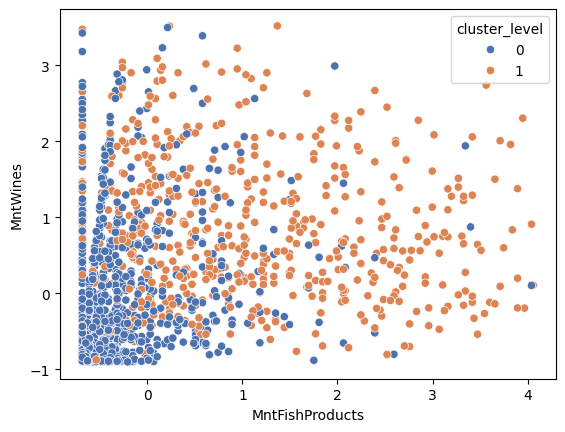

In [117]:

sns.scatterplot(data=df_scaled, x='MntFishProducts' ,y= 'MntWines',hue ='cluster_level',palette="deep")

## Conclusion of this Analysis

The process of customer segmentation ensures that your brand is customer-centric and helps you serve them better.
It boosts conversions, brings your marketing efforts to fruition, and also helps build everlasting customer relationships.

In [118]:
# Deploy the model if required